In [1]:
import pandas as pd
from Progenesis import ProgenesisData, MergedProgenesisData
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import warnings

# Load individual Progenesis export
When loading a Progenesis export, a few methods will be called automatically. For example, when annotated features have the same 'Accepted Description' we merge these features together and remove the original features. 

In [ ]:
ProData = ProgenesisData('Data/Pos/181210_UMETA_POS.csv',mode='pos')

In [3]:
ProData.data.head()

Accepted Description,686.88794,822.86357,618.90081,215.9993,550.91471,317.05534,482.92678,349.01696,898.83776,932.83224,...,313.90482,219.21057**,163.99045,249.02338,346.03389,70.94184****,179.06124,Methionine + Methioninesulfoxide,Glutamine + Glutamic acid / N-Methyl-D-Aspartic acid,Aspartic acid + Asparagine
sample_104,22249.4,18481.9,13511.1,0,11939.7,0,10970.9,0,14233.2,12042.5,...,1113.78,178.186,342720,266.449,3592.38,184.081,336.397,56311.7,198617,9116.33
sample_105,12428.9,9708.83,8267.7,0,8027.14,0,7175.5,0,3902.02,7159.73,...,1077.5,995.651,420484,176.072,3699.06,193.74,526.765,40499.5,54196.1,7881.98
sample_106,10021,7859.74,6551.12,0,8013.67,0,6501.44,0,3763.01,3229.88,...,960.468,1145.31,324786,269.928,3642.13,209.202,314.187,73966.6,84686.5,8730.63
sample_107,10717.6,12261.4,9452.11,0,7185.12,0,6954.05,0,6182.83,4045.47,...,803.335,1181.75,453266,235.639,3182.46,206.631,196.276,111875,39422.4,10601.4
sample_108,19747.5,17447.8,11846.5,0,11773.8,0,10592.6,0,10620.5,11305.1,...,353.571,621.9,2.95691e+06,106.621,2591.38,742.563,244.861,35110.5,64264.6,8461.95


In [4]:
ProData.data.tail()

Accepted Description,686.88794,822.86357,618.90081,215.9993,550.91471,317.05534,482.92678,349.01696,898.83776,932.83224,...,313.90482,219.21057**,163.99045,249.02338,346.03389,70.94184****,179.06124,Methionine + Methioninesulfoxide,Glutamine + Glutamic acid / N-Methyl-D-Aspartic acid,Aspartic acid + Asparagine
Highest Mean,NOR,NOR,NOR,QC,NOR,QC,NOR,QC,NOR,NOR,...,PAT,QC,NOR,QC,PAT,NOR,QC,QCQC,PATPAT,PATQC
Lowest Mean,QC,QC,QC,NOR,QC,NOR,QC,NOR,QC,QC,...,QC,PAT,PAT,PAT,NOR,PAT,PAT,PATPAT,NORNOR,NORPAT
Isotope Distribution,100 - 9.81 - 1.57,100 - 10.8 - 1.68,100 - 7.31 - 0.7,100 - 0.843 - 0.157,100 - 6.2 - 0.487,100 - 10.7 - 0.129,100 - 5.36 - 0.625,100 - 8.81,100 - 23.3 - 7.04,100 - 22 - 8.34,...,100 - 12.3,100 - 14.8,100 - 1.98,100 - 2.34,100 - 7.96,100 - 28.5,100 - 4.15,100 - 0.72 - 0.364 - 0.194 - 0.0463100 - 0.553...,100 - 0.48 - 0.229 - 0.136100 - 0.704 - 0.0593...,100 - 8.57 - 0.0714100 - 20.1 - 0.461
Maximum Abundance,18845.5,16662.1,13028.1,12709.3,12131.7,11396.4,10969.3,10661.3,9442.46,9197.13,...,944.43,1984.09,1.02461e+06,225.267,3584.74,337.492,584.155,131191,139417,21931
Minimum CV%,8.22,16.97,13.29,4.11,11,93.43,7.87,26.02,23.75,19.29,...,37.86,43.38,102.55,18.86,12.63,54.68,57.74,30.91,7.44,20.6


# Merge (8) batches 
The first agument of 'MergedProgenesisData' is a list of paths to the Progenesis exports which need to be merged. The first export is the reference batchs. Automatically, retention times will be corrected between the reference batch and the batch being merged. Merging batches is done on 4 levels:

1) Annotated features with the same name ('Accepted Description') will be pooled to the merged dataset

2) On MS/MS similarity score, retention time, neutral mass or m/z-value, median abundancy difference and isotope-pattern.

3) On retention time, neutral mass, median abundancy difference and isotope-pattern. 

4) On retention time, m/z-value, median abundancy difference and isotope-pattern

<br><br>
**Make sure if you use your own data that naming the files is according to**:
* '_UMETA_' must be in de file name 
* The filename of the MSMS-file (.msp) must be exactly the same but '_UMETA_' must be replaced by '_MS2_'



In [ ]:
# This might take some time

with warnings.catch_warnings():
    MergProData = MergedProgenesisData([ 'Data/Pos/190308_UMETA_POS.csv',
                                         'Data/Pos/190315_UMETA_POS.csv',
                                         'Data/Pos/190218_UMETA_POS.csv',
                                         'Data/Pos/181210_UMETA_POS.csv',
                                         'Data/Pos/181214_UMETA_POS.csv',
                                         'Data/Pos/181217_UMETA_POS.csv',
                                         'Data/Pos/190401_UMETA_POS.csv',
                                         'Data/Pos/190503_UMETA_POS.csv',
                                        ],  mode='pos',
                                       
                                      
                                      
                                      )

In [6]:
# Show merged data
# The Retention time (min) is the retention time of the reference batch
MergProData.data.iloc[0:10]

Accepted Description,cis-Aconitic acid / trans-Aconitic acid,"2,5-Furandicarboxylic acid",Citric acid*,2-Aminoadipic acid,S-Sulphocysteine,Phenylalanine,Indole,Tryptophan,Aspartic acid,(allo)Isoleucine,...,231.06492,671.66368,596.28977,382.055,148.11606,568.53787,96.15701,670.99502,568.78852,93.06675*
m/z,175.024,139.003,215.016,144.065,201.984,166.086,159.092,205.097,134.045,132.102,...,231.065,671.664,596.29,382.055,148.116,568.538,96.157,670.995,568.789,93.0667
Retention time (min),1.09388,1.52185,1.52185,0.9309,0.864983,3.58842,4.31773,4.31773,0.817517,1.80217,...,0.73295,5.66265,4.78325,0.883917,0.73295,4.7442,1.76447,5.66265,4.7442,3.5697
Isotope Distribution,100 - 0.98,100 - 6.44 - 0.817,100 - 6.82 - 1.41,100 - 1.3,100 - 1.33 - 0.781 - 0.181,100 - 0.523 - 0.0188,100 - 2.97,100 - 0.564 - 0.0873,100 - 1.54,100 - 0.427 - 0.00846,...,100 - 3.49,100 - 1.73,100 - 17.3,100 - 7.38,100,100 - 85 - 11,100,100 - 28.3,100 - 29.7 - 2.07,100 - 0.903
Accepted Compound ID,UMETA00141,UMETA00706,UMETA00143,UMETA00001,UMETA00071,UMETA00056,UMETA00040,UMETA00074,UMETA00015,UMETA00008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neutral mass (Da),174.016,156.006,192.027,NaN,200.977,165.079,117.058,204.09,NaN,131.095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compound,1.09_174.0164n,1.52_156.0058n,"1.52_192.0269n,1.52_230.9899m/z*",0.93_144.0655m/z,0.86_200.9765n,3.59_165.0789n,4.32_117.0578n,4.32_204.0898n,"0.82_134.0447m/z,0.81_156.0266m/z*",1.80_131.0946n,...,0.73_231.0649m/z,5.66_671.6637m/z,4.78_596.2898m/z,0.88_382.0550m/z,0.73_148.1161m/z,4.74_568.5379m/z,1.76_96.1570m/z,5.66_670.9950m/z,4.74_568.7885m/z,3.57_93.0667m/z
Adducts,"M+H-H2O, M+H","M+H-H2O, M+H","M+H-H2O, M+H, M+Na, 2M+Na,M+K*",M+H-H2O,"M+H, M+Na","M+H-H2O, M-NH3+H, M+H, M+Na, M+K","M-e, M+H, M+ACN+H","M-NH3+H, M+H, M+Na, M+K, 2M+H, 2M+Na","M+H,M+Na*","M+H, M+Na",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181214_Recipe_LOT543_4****,4007.15,662104,1.87789e+06,27477.5,136628,1.60206e+06,27711.4,500727,4708,619775,...,963.899,77.3376,25.3801,579.072,808.725,0,10.6262,166.859,0,186.673
sample_112***,258.524,6460.37,26330,2879.46,20.9226,233351,11013.8,189837,1877.13,118271,...,748.424,255.087,266.139,2219.63,758.623,1131.25,35.1269,370.636,696.701,220.545
sample_213*****,153.22,5617.9,10394.6,9559.34,6.25115,333788,10461.3,167835,165.207,351865,...,486.586,5589.1,1975.73,721.354,445.63,3435.56,34.6172,10479.9,2833.59,246.617


# Heatmap of merged batches

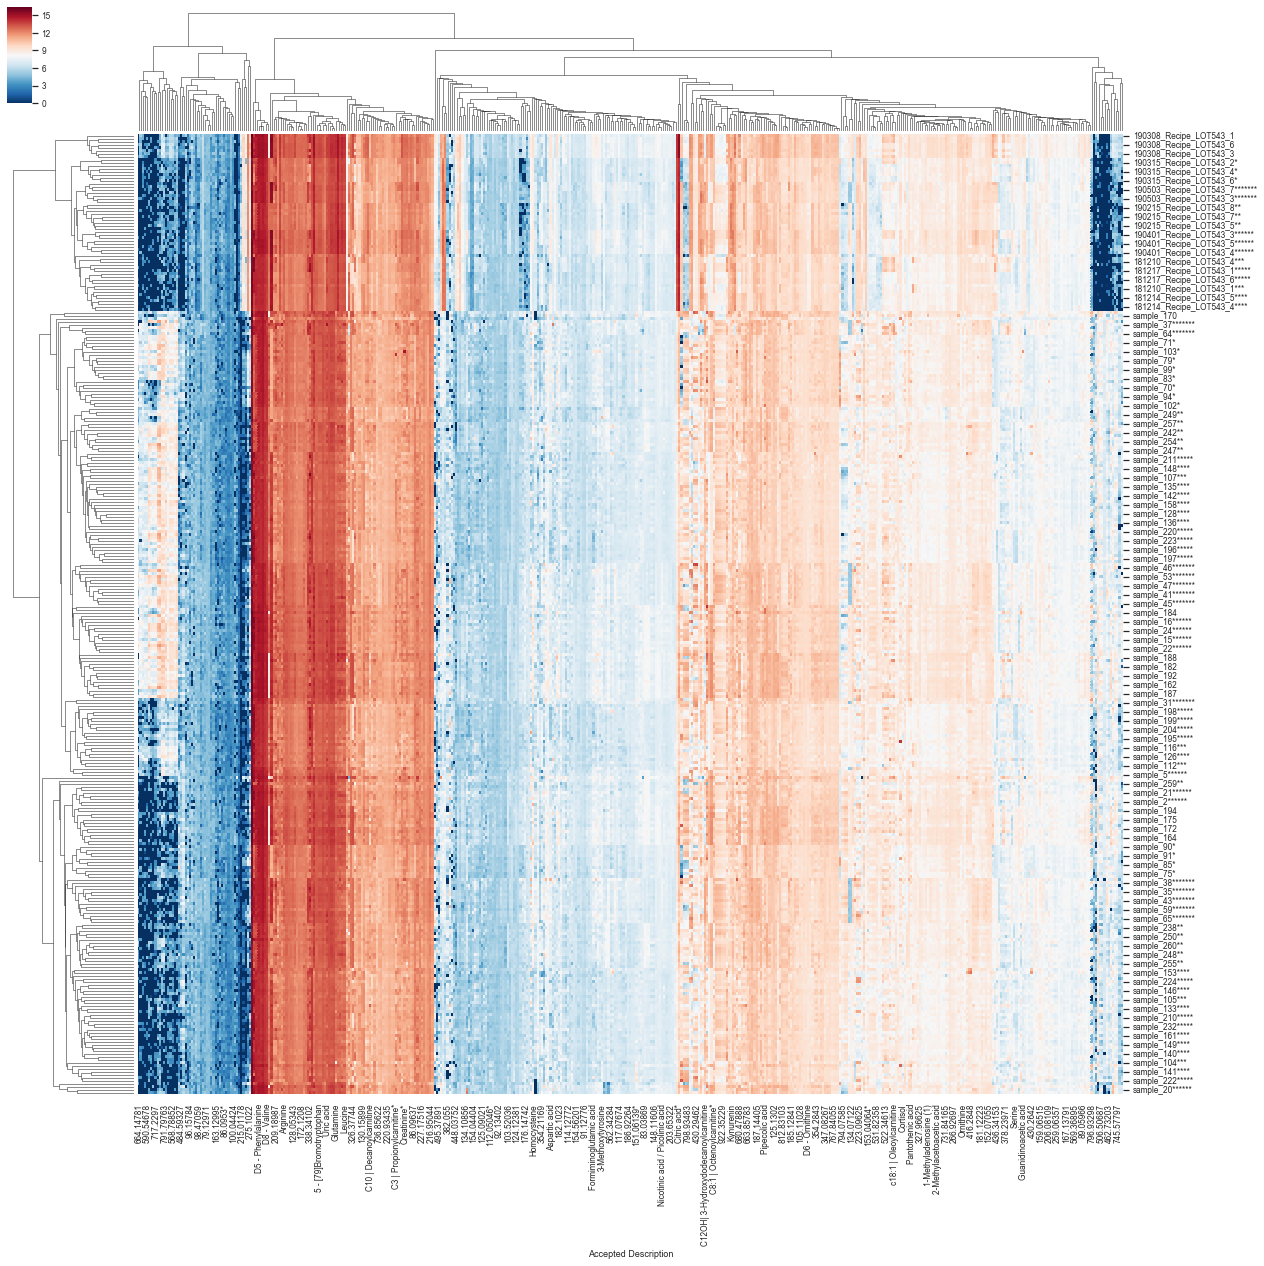

In [7]:
sns.set(font_scale=0.75)
sns.clustermap( MergProData.data.loc[ MergProData.all_IDs].fillna(0).apply(np.log1p), cmap='RdBu_r',figsize=(20,20) )

# Check matching features between Reference batch and other batches

In [8]:
# Check matching from matching also MSMS data
ind = 0 # if 0 it means the matching of the first other batch (not ref batch)
        # if 1, then you check the results from matching ref batch with second other batch etc.
MergProData.matches_from_msms[ind].drop(columns = ['Compound_x','Compound_y']).head()

,Compound_1,Compound_2,RT_1,RT_2,columns_1,columns_2,median_abun_1,median_abun_2,median_error,min_ppm_error_possible_nms_1,min_ppm_error_possible_nms_2,mz_1,mz_2,nm_1,nm_2,possible_nms_1,possible_nms_2,ppm_error_mz,ppm_error_nm,similarity_score
3,0.69_147.0112n,0.69_130.0079m/z,0.68615,0.69161,130.00792,130.00793*,11450.59144,5321.678503,54.0,NaN,0.150329,130.008,130.008,147.011,NaN,NaN,"[258.0012606, 236.0193606, 147.0112303, 129.00...",0.0792259,NaN,0.939691
4,0.69_175.0061n,0.69_158.0028m/z,0.68615,0.69161,158.00281,158.00282,40117.13450,19758.909780,51.0,NaN,0.106853,158.003,158.003,175.006,NaN,NaN,"[313.99103140000005, 292.0091314, 175.0061157,...",0.0436701,NaN,0.947116
6,9.08_519.3324n,9.11_520.3398m/z,9.07605,9.11738,520.33969,520.3398,346995.41900,282850.856100,18.0,NaN,0.169448,520.34,520.34,519.332,NaN,NaN,"[1038.665003, 1016.6831030000001, 537.3431015,...",0.214283,NaN,0.911150
7,9.65_186.9931n,9.64_188.0004m/z,9.65398,9.65413,188.0004,188.0004*,30688.52043,43780.968900,43.0,NaN,0.145460,188,188,186.993,NaN,NaN,"[373.9862016, 352.00430159999996, 205.0037008,...",0.0196808,NaN,0.982687
13,8.48_222.0890n,9.22_205.0858m/z,8.48427,9.22463,223.09629,205.08584,85147.64678,10359.272060,88.0,NaN,0.571843,223.096,205.086,222.089,NaN,NaN,"[408.15707960000003, 386.1751796, 222.0891398,...",80729.5,NaN,0.955926


In [9]:
# Check matching from annotated features
MergProData.matches_from_identifications[ind].head()

,columns_1,RT_1,mz_1,nm_1,IsDi_1,Adducts_1,Compound_1,column_stripped,columns_2,RT_2,mz_2,nm_2,IsDi_2,Adducts_2,Compound_2,median_abun_1,median_abun_2,median_error
0,cis-Aconitic acid / trans-Aconitic acid,1.09388,175.024,174.016,100 - 0.98,"M+H-H2O, M+H",1.09_174.0164n,cis-aconitic acid / trans-aconitic acid,cis-Aconitic acid / trans-Aconitic acid,1.08848,157.013,NaN,100 - 3.15,M+H-H2O,1.08_157.0131m/z,915.821699,586.375260,36.0
1,Carnosine,0.808117,227.114,NaN,100 - 7.53,M+H,0.81_227.1136m/z,carnosine,Carnosine,0.815746,249.095,NaN,100 - 4.92,M+Na,0.81_249.0954m/z,1721.344223,23.432047,99.0
2,"2,5-Furandicarboxylic acid",1.52185,139.003,156.006,100 - 6.44 - 0.817,"M+H-H2O, M+H",1.52_156.0058n,"2,5-furandicarboxylic acid","2,5-Furandicarboxylic acid",1.52356,139.003,156.006,100 - 6.41 - 0.639,"M+H-H2O, M+H",1.51_156.0059n,18037.541030,13548.994320,25.0
3,Citric acid*,1.52185,215.016,192.027,100 - 6.82 - 1.41,"M+H-H2O, M+H, M+Na, 2M+Na,M+K*","1.52_192.0269n,1.52_230.9899m/z*",citric acid,Citric acid,1.51331,215.016,NaN,100 - 6.42 - 1.65,"M+Na,M+H-H2O, M+H, M+K, 2M+Na*","1.50_215.0161m/z,1.51_192.0270n*",97903.375962,45612.182280,53.0
4,2-Aminoadipic acid,0.9309,144.065,NaN,100 - 1.3,M+H-H2O,0.93_144.0655m/z,2-aminoadipic acid,2-Aminoadipic acid,0.922427,162.076,161.069,100 - 3.7,"M+H-H2O, M+H, M+ACN+H",0.92_161.0688n,2587.919089,7403.212051,186.0


In [10]:
# Check matching from neutral matches
MergProData.matches_from_nm[ind].head()

,columns_1,columns_2,Compound_1,Compound_2,RT_1,RT_2,nm_1,nm_2,IsDi_1,IsDi_2,ppm_error_nm,Adducts_1,Adducts_2,IsDi_errors,median_abun_1,median_abun_2,median_error
0,172.97436,172.9744,1.56_189.9777n,1.54_189.9777n,1.56105,1.55431,189.978,189.978,100 - 3.46 - 5.08 - 5.12,100 - 4.1,0.208972,"M+H-H2O, M+H","M+H-H2O, M+H","[0.0, 7.57, 50.4, 50.59]",809.856749,220.153563,73.0
1,413.26556,391.28366,9.99_390.2763n,9.98_390.2764n,9.99203,9.98998,390.276,390.276,100 - 27.7 - 1.62 - 0.0617,100 - 23.1 - 0.43 - 0.0163,0.112741,"M+Na, M+K, 2M+Na","M+H, M+Na, M+K, 2M+Na","[0.0, 14.07, 17.98, 0.9]",60543.855630,39311.334300,35.0
2,393.29027,393.29008,9.99_392.2830n,9.98_392.2828n,9.99203,9.98998,392.283,392.283,100 - 9.88 - 0.174,100 - 7.73 - 0.0438,0.46701,"M+H, M+Na","M+H, M+Na","[0.0, 14.45, 2.52]",2871.437845,599.365129,79.0
8,440.98033,440.9804,1.52_439.9733n,1.51_439.9733n,1.52185,1.52356,439.973,439.973,100 - 11.9 - 1.33,100 - 11.7 - 0.905,0.0327293,"M+H, M+2H","M+H, M+2H","[0.0, 1.18, 6.71]",1281.659740,1048.385803,18.0
11,437.9722,437.97227,1.52_437.9727n,1.51_437.9728n,1.52185,1.52356,437.973,437.973,100 - 10 - 2.32,100 - 11 - 2.03,0.169417,"M-e, M+H","M-e, M+H","[0.0, 6.67, 3.96]",10977.897290,8381.476020,24.0


In [11]:
# Check matching from mz matches
MergProData.matches_from_nm[ind].head()

,columns_1,columns_2,Compound_1,Compound_2,RT_1,RT_2,nm_1,nm_2,IsDi_1,IsDi_2,ppm_error_nm,Adducts_1,Adducts_2,IsDi_errors,median_abun_1,median_abun_2,median_error
0,172.97436,172.9744,1.56_189.9777n,1.54_189.9777n,1.56105,1.55431,189.978,189.978,100 - 3.46 - 5.08 - 5.12,100 - 4.1,0.208972,"M+H-H2O, M+H","M+H-H2O, M+H","[0.0, 7.57, 50.4, 50.59]",809.856749,220.153563,73.0
1,413.26556,391.28366,9.99_390.2763n,9.98_390.2764n,9.99203,9.98998,390.276,390.276,100 - 27.7 - 1.62 - 0.0617,100 - 23.1 - 0.43 - 0.0163,0.112741,"M+Na, M+K, 2M+Na","M+H, M+Na, M+K, 2M+Na","[0.0, 14.07, 17.98, 0.9]",60543.855630,39311.334300,35.0
2,393.29027,393.29008,9.99_392.2830n,9.98_392.2828n,9.99203,9.98998,392.283,392.283,100 - 9.88 - 0.174,100 - 7.73 - 0.0438,0.46701,"M+H, M+Na","M+H, M+Na","[0.0, 14.45, 2.52]",2871.437845,599.365129,79.0
8,440.98033,440.9804,1.52_439.9733n,1.51_439.9733n,1.52185,1.52356,439.973,439.973,100 - 11.9 - 1.33,100 - 11.7 - 0.905,0.0327293,"M+H, M+2H","M+H, M+2H","[0.0, 1.18, 6.71]",1281.659740,1048.385803,18.0
11,437.9722,437.97227,1.52_437.9727n,1.51_437.9728n,1.52185,1.52356,437.973,437.973,100 - 10 - 2.32,100 - 11 - 2.03,0.169417,"M-e, M+H","M-e, M+H","[0.0, 6.67, 3.96]",10977.897290,8381.476020,24.0


# Normalize data

In [12]:
from Metchalizer import NormMetchalizer, NormPQN , NormBestCorrIS, NormMetchalizerLog, NormAnchor, LR_age_sex

In [13]:
merged_data = MergProData.data.loc[MergProData.all_IDs].apply(np.float64)

# Rename the internal standards for using normalization method(s)
# We need to 'tag' the internal standards such that the normalization methods knowns
# which feature is a internal standard.
rename_IS = {
             "1,3 -[15]N Uracil*": "IS_0",
             "5 - [79]Bromotryptophan": "IS_1",
             "D10 - Isoleucine": "IS_2",
             "D3 - Carnitine": "IS_3",
             "D4 - Tyrosine": "IS_4",
             "D5 - Phenylalanine": "IS_5",
             "D6 - Ornithine": "IS_6",
             "Dimethyl - 3,3 - glutaric acid": "IS_7",
             "[13]C - Thymidine ": "IS_8",
            }
# merged_data[list(rename_IS.keys())]

# Rename
merged_data = merged_data.rename(columns = rename_IS)

# Here the amount of stars in the sample ID indicate the batch 
batch_with_IDs = defaultdict(list)
for ID in merged_data.index:
    batch_with_IDs['batch_'+str(ID.count('*') )].append(ID)

In [14]:
# merged_data = merged_data.iloc[:,0:200]

### Choose normalization method

In [15]:
normalizer = NormMetchalizer(merged_data, batch_with_IDs, prefix_IS= 'IS_', prefix_QC_samples = 'Recipe_', 
                             remove_outliers_Z_threshold = 3, interia_per_threshold=75, lambda_1 = 0.5, lambda_2 = 1)

normalizer_2 = NormAnchor(merged_data, dict(batch_with_IDs), tag_QC='Recipe')


## Other normalization methods
# normalizer = NormMetchalizerLog(merged_data, batch_with_IDs, prefix_IS= 'IS_', prefix_QC_samples = 'Recipe_', 
#                              remove_outliers_Z_threshold = 5, interia_per_threshold=75)
# normalizer = NormPQN(merged_data)
# normalizer = NormBestCorrIS(merged_data,batch_with_IDs)

Total amount of standards: 9
Total amount of Anchor samples: 59


In [ ]:
# First normalization 
with warnings.catch_warnings():
    normalizer.normalize()

In [18]:
# Second normalization 
with warnings.catch_warnings():
    normalizer_2.normalize()

Done with normalization


# PCA on batches

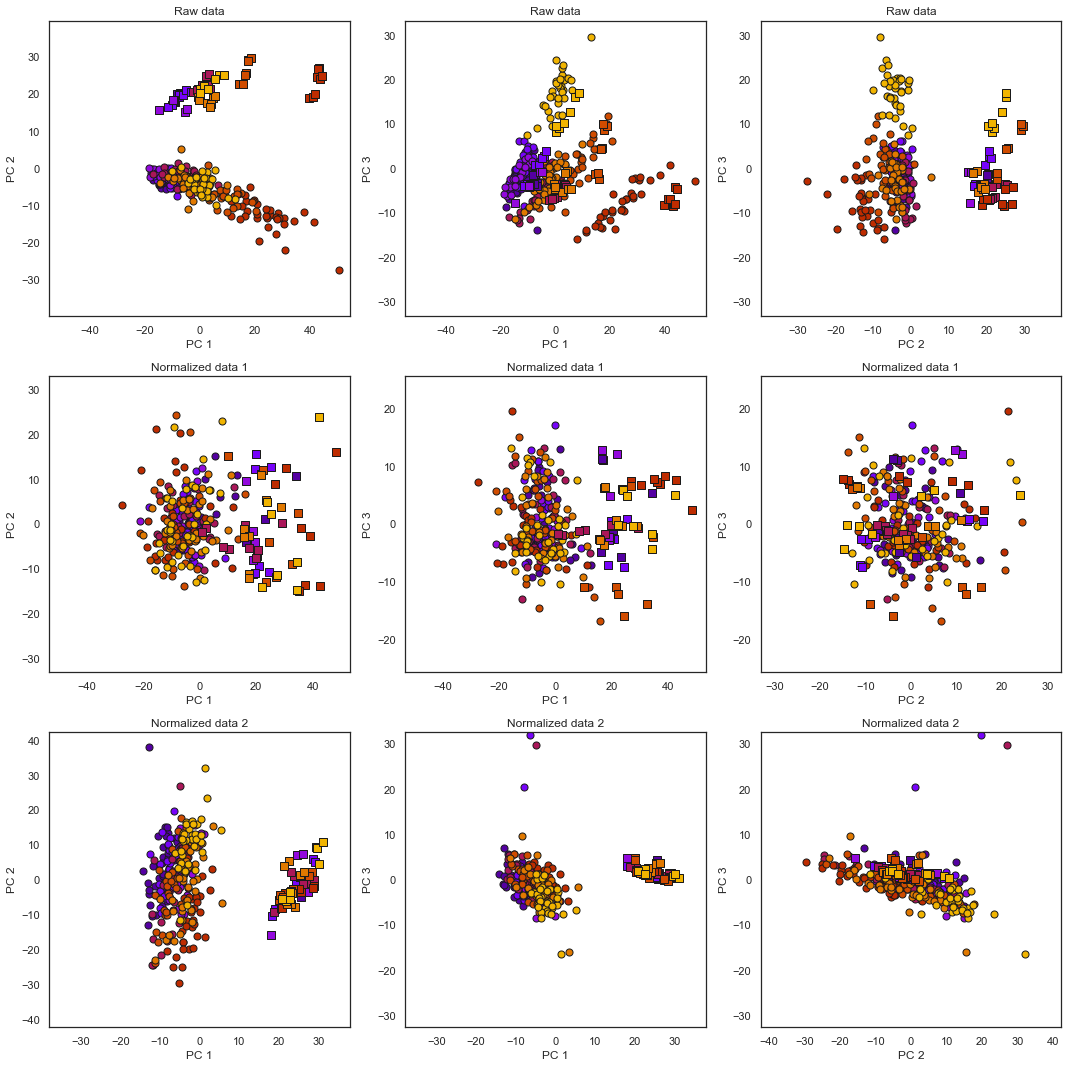

In [20]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn.decomposition import PCA

sns.set(context='notebook', style='white',font_scale=1)
colors = sns.color_palette('gnuplot',8)

QC_IDs = [ID for ID in merged_data.index if 'Recipe_' in ID]

dims = [(0,1),(0,2),(1,2) ]
marker_size = 50

perc = 1 # percentile for determining x,y limits in plot
range_scale = 1.8 # Zoom factor w.r.t x,y limits determined from percentiles

fig = plt.figure(figsize=(len(dims)*5,15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i,(title, data) in enumerate(zip(['Raw data','Normalized data 1','Normalized data 2'],
                                     [ merged_data, normalizer.data_normalized, normalizer_2.data_normalized  ])):
    data_norm_scaled = ( data - data.median() ) / data.mad() 
    tranformer = PCA(n_components=10)
    X_PCA = tranformer.fit_transform(data_norm_scaled.values )
    
    # Plot PCA with outliers
    for j,dim in enumerate(dims):
        ax = fig.add_subplot(3,len(dims),len(dims)*i+(j+1)  )
        for k,(batch,IDs) in enumerate( batch_with_IDs.items() ):
            x = data.index.isin( batch_with_IDs[batch]  )
            color_k = colors[k] 
            ax.scatter(X_PCA[x,dim[0]],X_PCA[x,dim[1]],color=color_k ,alpha=1,linewidths=1,edgecolor='k',s=marker_size )

        for k,(batch,IDs) in enumerate( batch_with_IDs.items() ):
            x = (data.index.isin( batch_with_IDs[batch] )) & ( data.index.isin(QC_IDs))
            color_k = colors[k] 
            ax.scatter(X_PCA[x,dim[0]],
                       X_PCA[x,dim[1]],
                       color=color_k, s=marker_size*1.2, marker='s',alpha=1 ,linewidth=1,edgecolor='k')

            
        x_low,x_high =  np.percentile(X_PCA[:,dim[0]],perc) * range_scale,   np.percentile(X_PCA[:,dim[0]],100-perc)*range_scale
        y_low,y_high =  np.percentile(X_PCA[:,dim[1]],perc) * range_scale,   np.percentile(X_PCA[:,dim[1]],100-perc)*range_scale
        x_width = (x_high - x_low)/2
        y_width = (y_high - y_low)/2
  
        ax.set_xlim([ -x_width, x_width])
        ax.set_ylim([ -y_width, y_width])

        ax.set_xlabel('PC '+str(dim[0]+1))
        ax.set_ylabel( 'PC '+str(dim[1]+1) )
        ax.set_title(title)

    fig.tight_layout()

# Evaluation of batch effect removal

We evaluated batch effect removal by determining the ratio in the QC samples:

$ WTR= \frac{\sigma^2_{within}}{\sigma^2_{tot}} = \frac{\sigma^2_{tot} - \sigma^2_{between}}{\sigma^2_{tot}}$



Normalization should not remove metabolic differences in the data. This can be observed by looking at how ranks are changed within the QC samples after normalization. Here 'rank' is an order number of the metabolite/feature after sorting the features on abundancy.

$ \Delta R_j =  \left | \bar{R}^{\text{raw}}_j - \bar{R}^{\text{normalized}}_j \right |   $

with $ \bar{R}^{\text{x}}_j $ being the average rank from all QC samples for metabolite $j$.  Lower numbers of  $\Delta R_j$ indicated better performances for normalization since ranks were conserved.


### Determine WTR scores from QC samples

In [21]:
WTR = []
for name_data,data in zip(['Raw','Normalized','Normalized 2'],
                          [normalizer.data, normalizer.data_normalized,normalizer_2.data_normalized ]):
    for metab in data.columns:   
        metab_means_per_batch = []
        x_metab_all = []
        for k,(batch,IDs) in enumerate( batch_with_IDs.items() ):
            IDs_QC = [ID for ID in IDs if 'recipe' in ID.lower()]
            
            x_metab = data.loc[IDs_QC, metab]
            x_metab_all.extend( x_metab.tolist() )
            
            metab_means_per_batch.append(x_metab.mean())

        std_between = np.var( metab_means_per_batch )
        std_total = np.var(x_metab_all)
        WTR.append([name_data,metab,(std_total - std_between)/std_total])

WTR = pd.DataFrame(WTR,columns = ['method','Metab','WTR'] )

C:\Users\041686\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


### Rank differences from QC samples

In [22]:
ranks = []

for name_data,data in zip(['Raw','Normalized','Normalized 2'],
                          [normalizer.data, normalizer.data_normalized,normalizer_2.data_normalized ]):
    # Get all QC samples in data
    IDs_QC = [ID for ID in data.index if 'recipe' in ID.lower()]
    data_QC = data.loc[IDs_QC]

    df_ = pd.DataFrame([])
    for ID,row in data_QC.iterrows():
        ind  = row.sort_values(ascending=False).index
        row_ = pd.Series([i for i in range(len(ind))], index= ind)
        row_.name = ID
        df_ = df_.append( row_,ignore_index=False )

    mean_ranks = df_.mean(axis=0)
    mean_ranks.name = name_data
    ranks.append(mean_ranks)
    
ranks = pd.DataFrame(ranks)
delta_R = (ranks - ranks.loc['Raw']).abs() 
Delta_R = pd.DataFrame([])

for i,row in delta_R.iterrows():
    row_ = row.reset_index()
    row_.columns = ['Metab','Rank_diff']
    row_ = row_.assign(method = row.name)
    Delta_R= pd.concat([Delta_R, row_ ])


## Plot WTR-scores and Rank differences
Note, that WTR-scores and $\Delta R$'s for Anchor (when using the QC samples) are not representative for normalization performance. 

Text(0.5, 0, '')

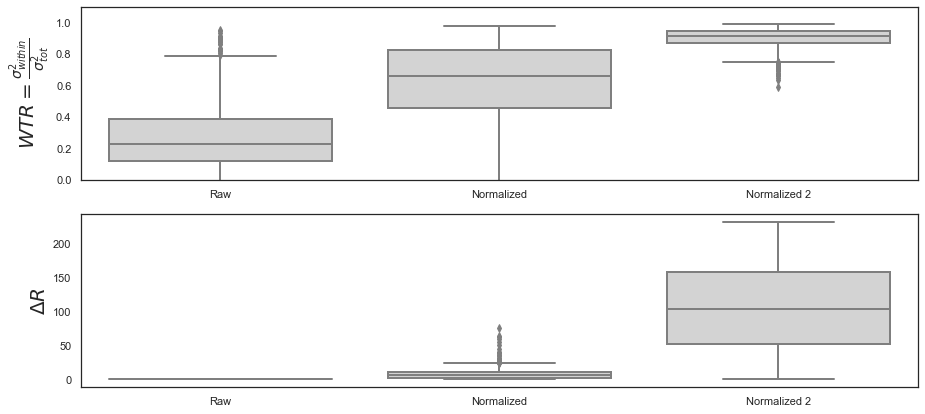

In [23]:
fig = plt.figure(figsize = (15,7))
sns.set(font_scale=1, style='white')
ax = fig.add_subplot( 2,1,1)
g = sns.boxplot( data= WTR,x= 'method',y='WTR' ,ax= ax, color='lightgrey',linewidth=2)
ax.set_ylabel(r'$ WTR = \frac{\sigma^2_{within}}{\sigma^2_{tot}}$',fontsize=20)
ax.set_xlabel('')
ax.set_ylim([0,1.1])


ax = fig.add_subplot( 2,1,2)
g = sns.boxplot( data= Delta_R,x= 'method',y='Rank_diff' ,ax= ax, color='lightgrey',linewidth=2)
ax.set_ylabel(r'$\Delta R$',fontsize=20)
ax.set_xlabel('')



# Regression model

In [24]:
metadata_samples = pd.read_csv('Data/Sample_metadata.csv').drop(columns = ['Unnamed: 0'])
norm_data = normalizer.data_normalized
metadata_samples = metadata_samples.assign(ID_in_data =  metadata_samples['ID'].map( { ID.strip('*'): ID for ID in norm_data.index } ) ).dropna()

age_sex_of_samples = metadata_samples.set_index('ID_in_data')[['Age_in_days','Sex']]
age_sex_of_samples['Sex'] = age_sex_of_samples['Sex'].apply(lambda x: 1 if x.lower() == 'v' else 0)

In [29]:
# Fit model
metabolite = norm_data.columns.tolist()[20]

model = LR_age_sex(a=1,b=1) 
model = LR_age_sex(polynomials = 3, a = 365, b= 1, Z_outlier_threshold=4)
X = age_sex_of_samples
y = norm_data.loc[age_sex_of_samples.index, metabolite]
model.fit(X , y ,interaction=True) # interaction sex*age can be False or True. Offset in sex cannot be altered


Text(0.5, 0, 'Age')

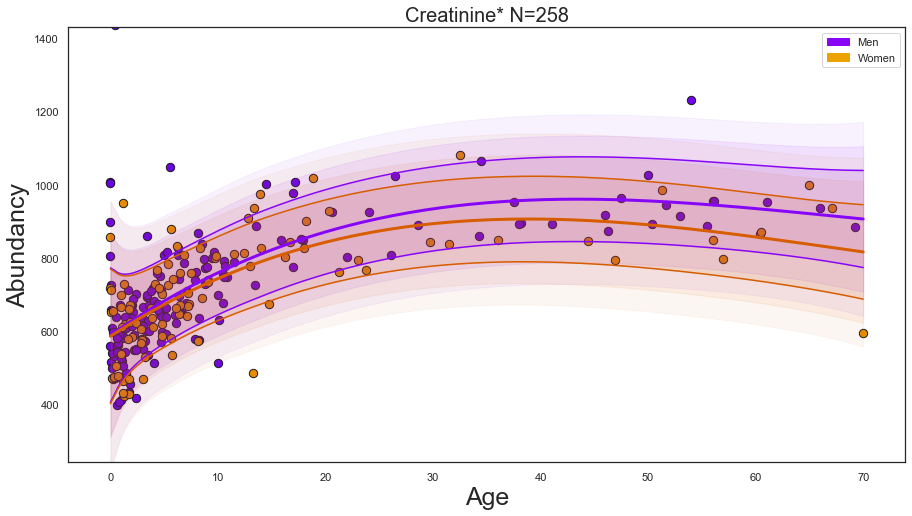

In [30]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
factor_age = 1/365 # The model uses age in days. For plotting we want years
scaling = 1 # Determines ylimits 


colors = sns.color_palette('gnuplot',10)
for col,(sex,data_gb) in zip([colors[1],colors[-2]],X.groupby('Sex')):
    ax.scatter( data_gb['Age_in_days']*factor_age, y.loc[data_gb.index],
               alpha=0.99,color= col,s=70,linewidth=1, edgecolor='k')

    
res = model.predict(X)
res.index= X.index
res = res.assign(y = y )

y_fit,y_std = res['y_pred'],res['std_pred']
ax.set_ylim([ np.percentile(y_fit,5) * (1-scaling), np.percentile(y_fit,95) *(1+scaling)] )

colors = sns.color_palette('gnuplot',6)
amount= 200
new_legend = []
for col, women_men in zip([colors[1],colors[-2]],[0,1] ):
    X_fit = pd.DataFrame( [np.linspace(X['Age_in_days'].min(),X['Age_in_days'].max(),amount),np.ones(amount)*women_men ]).T
    X_fit.columns = ['Age_in_days','Sex']

    res_ = model.predict(X_fit)

    y_fit,y_std = res_['y_pred'],res_['std_pred']

    ind = np.argsort( X_fit['Age_in_days'] )
    ax.plot( X_fit['Age_in_days'].iloc[ind]*factor_age, y_fit.iloc[ind],c=col,linewidth=3, label=str(women_men))
    ax.plot( X_fit['Age_in_days'].iloc[ind]*factor_age, (y_fit- y_std).iloc[ind],c=col)
    ax.plot( X_fit['Age_in_days'].iloc[ind]*factor_age, (y_fit+ y_std).iloc[ind],c=col)
    intervals = np.linspace(1,2,3)
    for u in intervals:
        ax.fill_between( X_fit['Age_in_days'].iloc[ind]*factor_age, 
                         (y_fit- y_std*u).iloc[ind],
                         (y_fit+ y_std*u).iloc[ind],alpha=0.15 - np.diff(intervals)[0]*u/10,color=col)



patch_men = mpatches.Patch(color=colors[1], label='Men')
patch_women = mpatches.Patch(color=colors[-1], label='Women')
ax.legend(handles=[patch_men,patch_women])

ax.set_ylim([ (y_fit - 5*y_std).mean() , (y_fit + 5*y_std).mean() ])
ax.set_title(metabolite.lower().capitalize()+' '+'N='+str(len(model.not_outlier_IDs)),fontsize=20)
ax.set_ylabel('Abundancy',fontsize=25)
ax.set_xlabel('Age',fontsize=25)

## Obtain significance of regression coefficients

In [31]:
model.p_values(n_bootstraps=100,train_size=0.9)

In [32]:
model.p_vals_fits.head()

,0,1,2,3,Sex,interaction
0,2.074866e-283,1.733502e-12,0.002532,0.141760,0.886449,0.070549
1,3.706557e-287,7.309988e-12,0.006954,0.289984,0.920799,0.159098
2,2.426948e-274,6.671701e-13,0.001750,0.125876,0.883893,0.165080
3,7.171490e-290,8.640239e-13,0.001416,0.093488,0.756593,0.039382
4,4.967122e-285,1.091316e-11,0.003543,0.153200,0.799704,0.084407


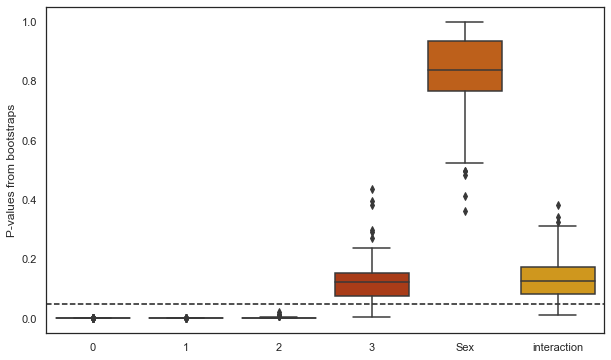

In [33]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
sns.boxplot( data = model.p_vals_fits, palette='gnuplot' ,ax=ax)
ax.set_ylabel('P-values from bootstraps')
ax.hlines(0.05,-0.5,5.5,linestyle='--')